# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about tidying data and goes over how to make cleaning data simple and easy. The paper goes over tools for making it easier to tidy data and then use it for data analysis that consist of making data strucutes uniform and consistent and going over data manipulation. 
2. The "tidy data standard" makes the first steps of data cleaning and preparing easier because it means you do not need to start from square one and do something brand new every time you start cleaning your data. The tidy data standards intends to simplify the the beginning stages of data analysis and make the anaysis easier so that you can focus on the patterns and observations rather than trying to understand the logistics and cleaning of the data. 
3. The sentence "Like families, tidy datasets are all alike, but every messy dataset is messy in its own way" means that the tiday datasets all follow the tidy data standard which gives them similar characteristics because they are all initially cleaned up using the same data strucrtures and prepared so that they can be better understood during data analysis. Datasets that do not follow the tidy data standard are all unique because they each have missing values, outliers, and other inconsistencies that are distinct for that specific dataset, which is what the second half of the sentence from the introduction is converying. The sentence "For a given dataset, it's ususally easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." is conveying that when doing analysis on one specific dataset, it is simple to identify what the observations and variables are based on how they are organized in the data structure, however the paper displays the same data in 3 differnt tables, which can make it confusing and more complicated to identify what are the observations and what are the variables because in a broader, more general context, the data can be distributed in an unstructured way which can make it more complicated to establish what are the data observations and variables. 
4. values - what a dataset is made up of. values can either be quantitative as numbers or qualitative as a string. Every value belongs to a variable and an observation  
     variable - a variable contains all values that measure the same attribute (ex: height, temperature, duration). It is easier to describe funcitonal relationships between variables  
     observation - contains all values measured on the same unit (person, day, or race). It is easier to make comparisons between groups of observations 
5. There are 3 attributes of tidy data. In tidy data it is required that each variable forms a column, each observation forms a row, and each type of observational unit forms a table. This is a standard way of mapping the meaning of a dataset to its datastructure. 
6. The five most common problems with messy data sets are:  
    + Column headers are values, not variable names
    + Multiple variables are stored in one column
    + Variables are stored in both rows and columns
    + Multiple types of observational units are stored in the same table
    + A single observational unit is stored in multiple tables 
    The data in Table 4 are messy because variables are being stored in both the rows and the columns and the column headers are values not names. To tidy this data, we can melt the data. Data melting is when you turn rows into columns and reshape the data into a long format. 
7. Table 11 is messy data because the dates are stored as separate variables which leaves a large amount of blank values in the table. Table 12 is molten because it combines the columns from table 11 so that there is 1 variable that represents the date, and this makes the dataset more narrow, and the tidy data set, there are two measured variables so that there are less entries in the table, and the observations are more concise, rather than having two observations for each tmax and tmin. 
8. The chicken-and-egg problem that is present with tidy data is that if tidy data is only as useful as the tools that work with it, so the availability and development of tools will only be produced and used if tidy data continues to be implemented and utilized as well. Wickham hopes that others in the future will continue to build on tidy data framework to develop better solutions for data storage and even better tools to tackle the challenge of tidying data for better data anaysis. 





**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
# Question 2.1 - Cleaning Price variable in airbnb dataset

import pandas as pd
import numpy as np
df = pd.read_csv('./data/airbnb_hw.csv')
price = 'Price'


df[price] = df[price].str.replace(',','') # deleting commas 
df[price] = df[price].replace(' ',np.nan) # Notice the column replacement
df[price] = df[price].astype(float).round(2)
print(df[price].dtype)
print(df[price].head(10))


# In order to clean the Price variable, the first thing that I did was delete all of the commas that existed 
# in the entries for prices that were greater than 1,000. By deleting the commas, I was then able to convert 
# the data type from an object so that all of these data were uniform as a float, and were rounded to two
# decimal places since they represent the prices in dollars. Before doing all of this cleaning, the datatype 
# was not uniform and there were inconsistencies in the data because values over 1000 had commas, so it was
# not as easy to parse through to find certain values. Now that the data is clean, analysis can be done 
# because it can be sorted through and filtered because they are all quantitative numbers of type float where
# before, the type did not allow for ease of filtering and analysis 

float64
0    145.0
1     37.0
2     28.0
3    199.0
4    549.0
5    149.0
6    250.0
7     90.0
8    270.0
9    290.0
Name: Price, dtype: float64


In [2]:
# Question 2.2 - Cleaning Type variable in shark dataset 
sharks_df = pd.read_csv('./data/sharks.csv')
var = 'Type' 
unique_types = sharks_df[var].unique()
print("Type variables before cleaning: " , unique_types) 
 # dropping the observations with no value
sharks_df.dropna(subset=[var], inplace=True)

# Combining some of the types because they are similar 
sharks_df[var] = sharks_df[var].replace(['Boating', 'Boat', 'boatomg', 'Watercraft', 'Boatomg'], 'Watercraft')
sharks_df[var] = sharks_df[var].replace(['Unconfirmed', 'Unverified', 'Questionable', 'Under investigation', 'Invalid'], 'Unknown')

unique_types = sharks_df[var].unique()
print('Type variables after cleaning: ' , unique_types) 

# In order to clean up the Type variable in the sharks dataset, the first thing That I did was see what the 
# values were that existed for observations in the data frame. There were some observations that had nan as 
# their entry, and after searching in the data set it looked like lots of these nan were empty observations 
# that did not have other data, so I dropped them from the dataframe. The next thing that I did to clean 
# the data was replace the incorrect spelling such as 'boatomg' and 'Boatomg' and also combined certain 
# values if they indicated the same result. This cleaned the data by eliminating inconsistencies in the 
# values and consolidating the values that exist for that variable if they were representing the same outcome before. 


Type variables before cleaning:  ['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']
Type variables after cleaning:  ['Unprovoked' 'Provoked' 'Unknown' 'Watercraft' 'Sea Disaster']


/var/folders/8_/6hshqn4n5xbfjbj0cjjrrv9w0000gn/T/ipykernel_58615/1888458683.py:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks_df = pd.read_csv('./data/sharks.csv')


In [3]:
# Question 3 - Dummy Variable 
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial_df = pd.read_csv(url,low_memory=False) 


In [4]:
var = 'WhetherDefendantWasReleasedPretrial'
print(pretrial_df[var].value_counts())

pretrial_df[var] = pretrial_df[var].replace(9, np.nan)


# This is a dummy variable which means it is representing a binary variable, 1s indicate that the defendant
# was released pretrial and 0s mean that the defendant was not released pretrial. In order to find what the 
# values were for this variable, I printed the unique values and found out that the values were [9 0 1], and
# there were 31 observations with 9 as the value. The 9s that exist for observations were making the data 
# very messy, so in order to clean the data I replaced all of the 9s with np.nan


1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


In [5]:
# Question 2.4 Missing values, not at random: For the pretrial data covered in the lecture, 
# clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices 
# you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

var1 = 'ImposedSentenceAllChargeInContactEvent'
var2 = 'SentenceTypeAllChargesAtConvictionInContactEvent'
new_df = pretrial_df[[var1,var2]]

print(pretrial_df[var1].value_counts())
new_df.head(15)

                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: ImposedSentenceAllChargeInContactEvent, Length: 484, dtype: int64


,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,,9
1,60,0
2,12,1
3,.985626283367556,1
4,,4
5,12,0
6,36,1
7,6,0
8,24,1
9,12,1


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [6]:
# Question 4.2
print("air bnb dataframe dimensions: " , df.shape)
# There are 30478 observations in in the dataframe, and 13 variables included 

df.head()

air bnb dataframe dimensions:  (30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [7]:
# Question 4.3: Cross tabulate `Room Type` and `Property Type`. 
# What patterns do you see in what kinds of rentals are available? 
# For which kinds of properties are private rooms more common than renting the entire property?

data = pd.crosstab(df['Room Type'], df['Property Type'])
print(data)

# The most common type of rental that is available are apartments, and when there are apartments available,
# there are varieties between renting the entire apartment or renting a private room. Another popular 
# property type is a loft, bed and breakfast, and condominium. The least popular room type is shared room,
# lots of the property types do not have this as an option to rent out. Private rooms are more common than 
# renting the entire property in Houses. There are 1258 available private rooms in housesbut only 752 entire
# homes available. 

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

<AxesSubplot: >

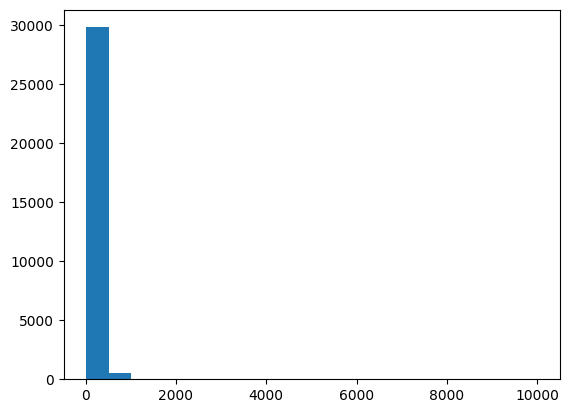

In [10]:
# Question 4.4: For `Price`, make a histogram, kernel density, box plot, and a statistical description
# of the variable.  Are the data badly scaled? Are there many outliers?
# Use `log` to transform price into a new variable, `price_log`, and take these steps again.
import numpy as np
import matplotlib.pyplot as plt

df['Price'].hist(bins=20, grid=False) # Histogram for price before doing price_log

<AxesSubplot: >

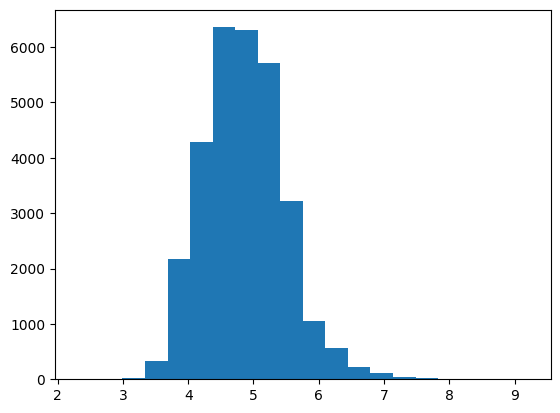

In [12]:
df['price_log'] = np.log(df['Price'])
df.loc[df['price_log']>0, 'price_log'].hist(bins=20,grid=False) # Histogram for price_log

# WRITE STUFF HERE

<AxesSubplot: ylabel='Density'>

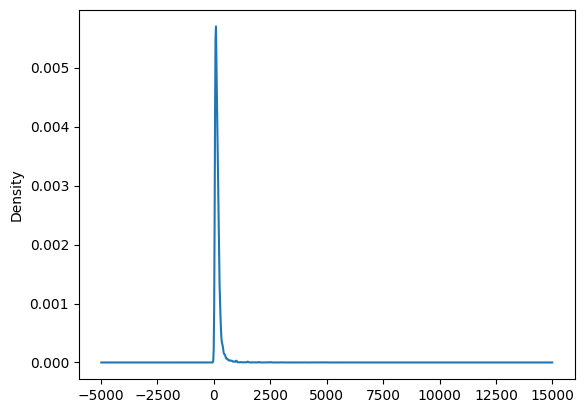

In [13]:
df['Price'].plot.density() # Kernel Density Plot for Price

# WRITE STUFF HERE

<AxesSubplot: ylabel='Density'>

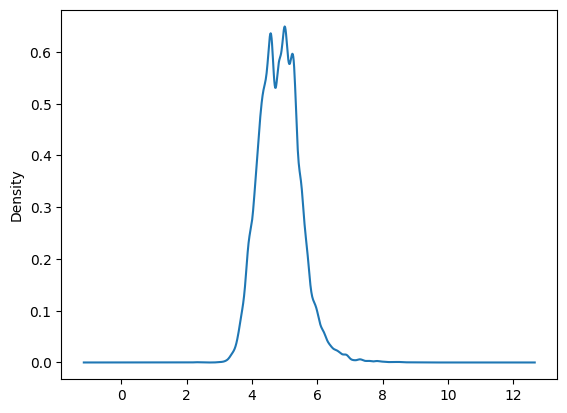

In [14]:
df['price_log'].plot.density() # Kernel Density Plot for price_log

#WRITE STUFF HERE

<AxesSubplot: >

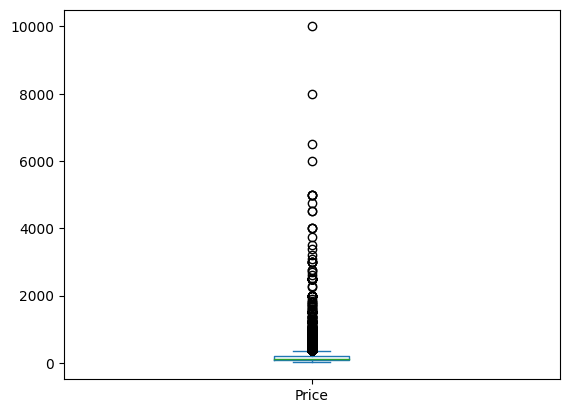

In [15]:
df['Price'].plot.box() # Box plot for price 

<AxesSubplot: >

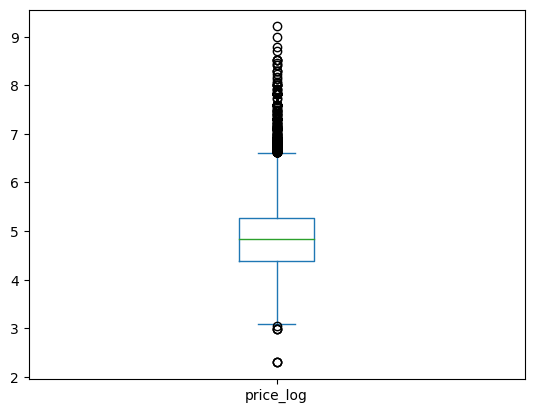

In [16]:
df['price_log'].plot.box()

In [19]:
descr = df['Price'].describe()
print('Statistical Description of Price')
print(descr)
print()

print('Statistical Description of price_log')
descr2= df['price_log'].describe()
print(descr2)

Statistical Description of Price
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

Statistical Description of price_log
count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.